https://busy-tote-498.notion.site/YOLO-unifed-real-time-object-detection-afd0d2b77c1c4b7f9ba949a1d96524ae

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
box= pd.read_csv('/content/drive/MyDrive/data (2)/train_solution_bounding_boxes (1).csv')
box

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


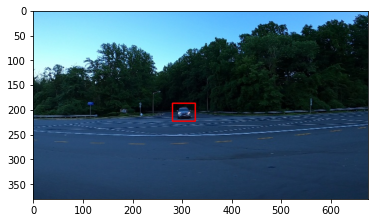

In [5]:
sample= cv2.imread('/content/drive/MyDrive/data (2)/training_images/vid_4_1000.jpg')
sample= cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point= box.iloc[0]
pt1= (int(point['xmin']),int(point['ymax']))
pt2=(int(point['xmax']),int(point['ymin']))
cv2.rectangle(sample,pt1,pt2,color=(255,0,0),thickness=2)
plt.imshow(sample)

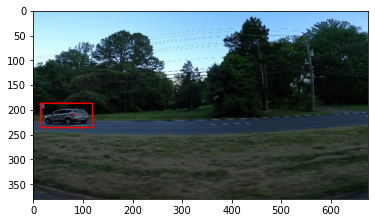

In [6]:
sample= cv2.imread('/content/drive/MyDrive/data (2)/training_images/vid_4_10000.jpg')
sample= cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point= box.iloc[1]
pt1= (int(point['xmin']),int(point['ymax']))
pt2=(int(point['xmax']),int(point['ymin']))
cv2.rectangle(sample,pt1,pt2,color=(255,0,0),thickness=2)
plt.imshow(sample)

In [7]:
net= cv2.dnn.readNet("/content/drive/MyDrive/yolov3.weights","/content/drive/MyDrive/yolov3.cfg")
classes=[]
with open("/content/drive/MyDrive/coco.names","r") as f:
  classes= [line.strip() for line in f.readlines()]
layer_names= net.getLayerNames()
output_layers=[layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [9]:
img = cv2.imread('/content/drive/MyDrive/data (2)/training_images/vid_4_10000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape

In [10]:
blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)
net.setInput(blob)

# outs는 출력으로 탐지된 개체에 대한 모든 정보와 위치를 제공한다.
outs = net.forward(output_layers)

In [11]:
# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [12]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

22 197 92 32


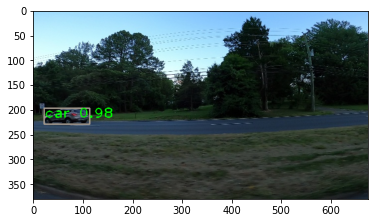

In [13]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

for i in indexes.flatten():
    x, y, w, h = boxes[i]
    print(x, y, w, h)
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    color = colors[i]
    cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
    cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

plt.imshow(img)

In [14]:
def predict_yolo(img_path):
  # 이미지 가져오기
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  height, width, channels = img.shape

  blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)
  net.setInput(blob) 
  outs = net.forward(output_layers)

  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              # Object detected
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)
              # 좌표
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)
              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

  font = cv2.FONT_HERSHEY_PLAIN
  colors = np.random.uniform(0, 255, size=(len(boxes), 3))
  if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i], 2))
        color = colors[i]
        cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
        cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

    plt.imshow(img)
  
  else:
    print('탐지된 물체가 없습니다.')

148 203 156 42


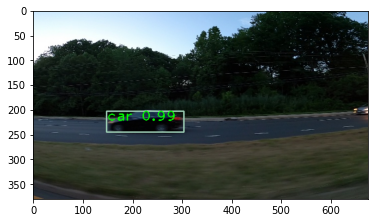

In [15]:
import glob
import random

paths = glob.glob('/content/drive/MyDrive/data (2)/testing_images/*.jpg')

img_path = random.choice(paths)

predict_yolo(img_path)

604 166 15 25


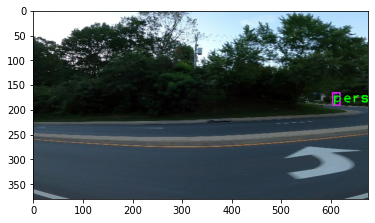

In [16]:
img_path = random.choice(paths)

predict_yolo(img_path)